# **GeoDiscovery: Exploratory Analysis of Geolocational Data**
### Project by Mradul Gupta, Nimit Agrawal, Prateek Agarwal
---
## Introduction:
This project is focused on analyzing geolocational data to recommend accommodations to immigrants in a city, such as Bangalore. The goal is to use K-Means Clustering on datasets to classify accommodation for incoming students based on their preferences, including amenities, budget, and proximity to certain locations.

### Objectives:
- **Data Fetching & Cleaning**
- **Data Exploration & Visualization**
- **K-Means Clustering**
- **Geolocational Data Collection**
- **Final Presentation**

---
## Task 1: Data Preparation:
The first step is to fetch the datasets, clean them, and prepare them for further analysis. The dataset will be read using `pandas` and unnecessary columns will be removed. This process is crucial to ensure that the analysis is efficient and accurate.


In [2]:
# Importing important Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import requests
import folium
from folium.plugins import MarkerCluster

In [3]:
# Loading the dataset
df=pd.read_csv("food_coded.csv")
df.shape

(125, 61)

In [4]:
# Quick overview of the dataset
df.head(5)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [5]:
df.tail(5)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135
124,3.9,1,1,430,NaN,315.0,2,"Chocolates, pizza, and Ritz.","hormones, Premenstrual syndrome.",NaN,...,1.0,2.0,2,725.0,345,NaN,4,2,575,135


In [6]:
df.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,108.000000,...,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,1.388889,...,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,0.974759,...,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

### Data Cleaning:
#### Dropping irrelevant columns, duplicated values and handling NaN values

In [8]:
columns_to_remove=['GPA', 'Gender','breakfast','calories_chicken','calories_day','calories_scone','coffee','comfort_food','comfort_food_reasons','comfort_food_reasons_coded','comfort_food_reasons_coded.1','cuisine','diet_current','diet_current_coded','drink','eating_changes','eating_changes_coded','eating_changes_coded1','father_education','father_profession','fav_cuisine','fav_cuisine_coded','fav_food','food_childhood','fries','grade_level','greek_food','healthy_feeling','healthy_meal','ideal_diet','ideal_diet_coded','indian_food','italian_food','life_rewarding','marital_status','meals_dinner_friend','mother_education','mother_profession','nutritional_check','parents_cook','persian_food','self_perception_weight','soup','thai_food','tortilla_calories','turkey_calories','type_sports','vitamins','waffle_calories','weight']
df=df.drop(columns=columns_to_remove)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cook           122 non-null    float64
 1   eating_out     125 non-null    int64  
 2   employment     116 non-null    float64
 3   ethnic_food    125 non-null    int64  
 4   exercise       112 non-null    float64
 5   fruit_day      125 non-null    int64  
 6   income         124 non-null    float64
 7   on_off_campus  124 non-null    float64
 8   pay_meal_out   125 non-null    int64  
 9   sports         123 non-null    float64
 10  veggies_day    125 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 10.9 KB


In [9]:
# Checking for NULL values
df.isnull().sum()

cook              3
eating_out        0
employment        9
ethnic_food       0
exercise         13
fruit_day         0
income            1
on_off_campus     1
pay_meal_out      0
sports            2
veggies_day       0
dtype: int64

In [10]:
# Handling Null values
df=df.fillna(0)
df.isnull().sum()

cook             0
eating_out       0
employment       0
ethnic_food      0
exercise         0
fruit_day        0
income           0
on_off_campus    0
pay_meal_out     0
sports           0
veggies_day      0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

The dataset is now ready for further analysis.

---

## Task 2: Data Exploration and Visualization:
### In this step, we will explore the dataset using descriptive statistics and visualize it using box plots to gain insights into the distribution of various parameters.

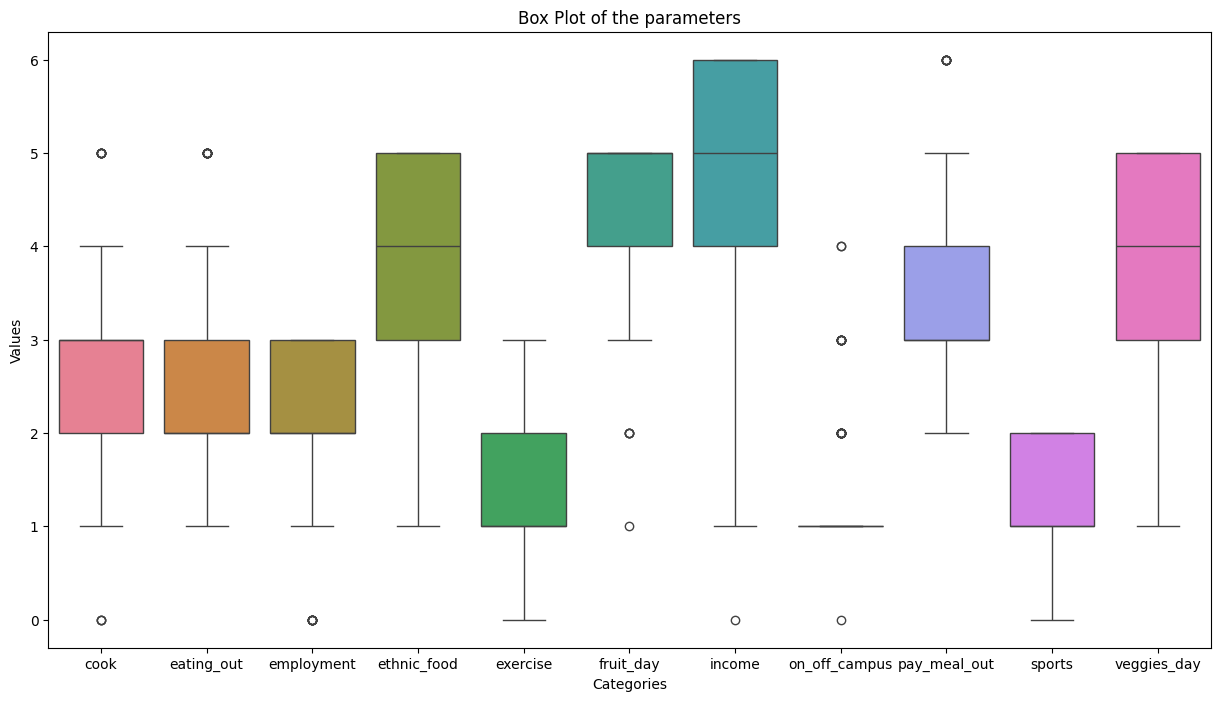

In [12]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title('Box Plot of the parameters')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

**Insights from Box Plot:**
- **Cook**: The majority of people cook 2- A couple of times a week or 3 - Whenever they can, but that is not very often  
- **Eating_out**: Majority of people eat out 2- 1 to 2 times or 3- 2 to 3 times 
- **Employment**: Most of the people are doing 2- part time job or 3- no job
- **Ethnic_food**: Among (1- very unlikely, 2- unlikely, 3- neutral, 4- likely, 5- very likely) most people choose 2,3,4.
- **Exercise**: Majority of people do exercise 1- Everyday 2- Twice or three times per week.
- **Fruit_day**: Most of the people 4- likely or 5- very likely to eat fruit in a regular day. 
- **Income**: Majority of people having income more than $50,000.
  
- **on_off_campus – living situation**: Almost everyone living in campus.
- **pay_meal_out - Amount they would pay for meal out**: Majority pays 10 to 30 dollars.
  
- **Sports**: It's equally likely to happen they do sport or not.
- **Veggies_day**: Majority lies in between [2- unlikely, 3- neutral, 4- likely].

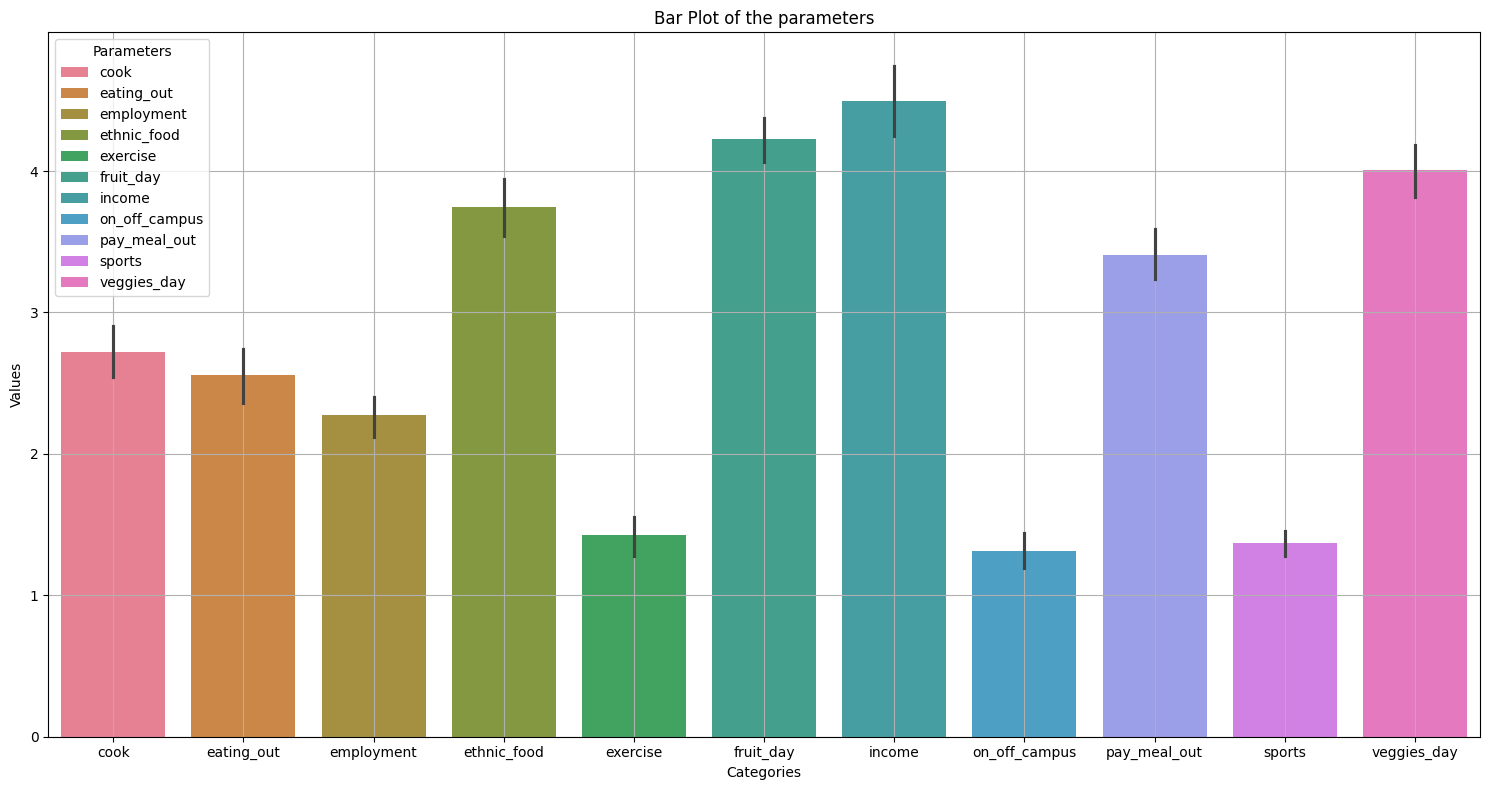

In [13]:
plt.figure(figsize=(15, 8))
ax=sns.barplot(data=df, legend=True)
plt.title('Bar Plot of the parameters')
plt.xlabel('Categories')
plt.ylabel('Values')
ax.legend(title='Parameters')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
df.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4


---
## Task 3: K-Means Clustering
 K-Means clustering is used to group locations based on various features such as income, exercise habits, and food preferences. The optimal number of clusters, `K`, will be determined through experimentation.
### Finding the optimal value of K through different methods:

In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

### Elbow Method:

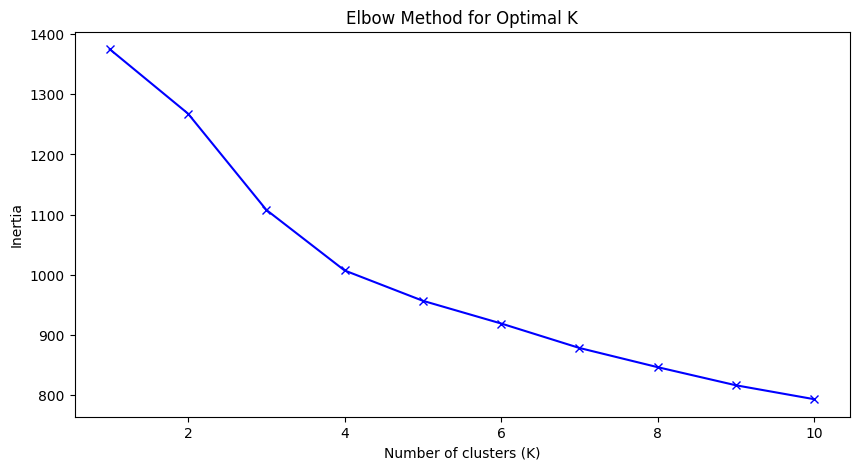

In [16]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

The **elbow method** is a graphical method for finding the optimal K value in a k-means clustering algorithm.<br>
The **optimal K value** is the point at which the graph forms an elbow.<br>
**Here Optimal K value is 3.**

### Silhouette Score:

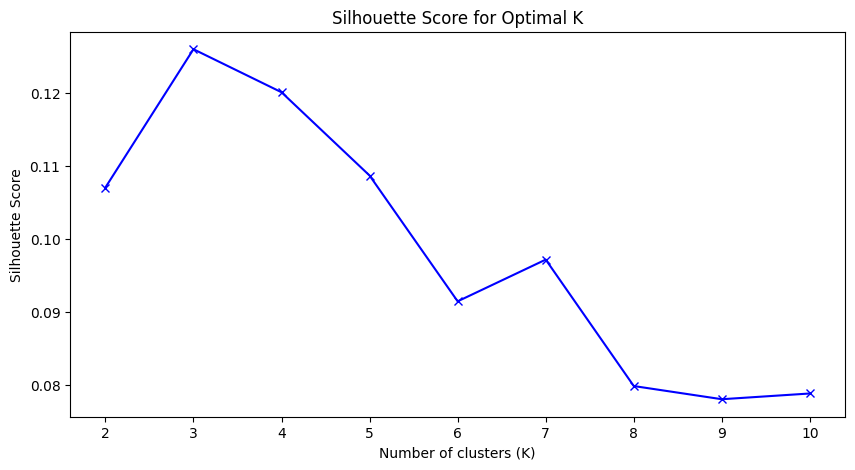

In [17]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

In [18]:
best_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters (K) is: {best_k}")

The optimal number of clusters (K) is: 3


**Here Optimal K value is 3.** <br>
In conclusion, The optimal K value from both the method **Elbow Method** and **Silhouette Score** is `3`. 

### Making the data fit for K mean clustering:

In [19]:
optimal_k = best_k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_kmeans.fit(scaled_data)

df['Cluster'] = final_kmeans.labels_
df.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day,Cluster
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5,0
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4,0
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5,1
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3,2
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4,0


In [20]:
df.tail()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day,Cluster
120,3.0,2,1.0,4,2.0,5,4.0,3.0,4,1.0,5,1
121,3.0,4,3.0,3,2.0,4,2.0,1.0,4,0.0,5,0
122,3.0,3,3.0,5,2.0,4,2.0,1.0,4,2.0,4,0
123,3.0,5,2.0,2,1.0,5,4.0,1.0,3,2.0,3,2
124,0.0,1,2.0,3,2.0,3,5.0,1.0,3,2.0,4,2


In [21]:
# Calculating the mode column-wise for each cluster
df = df.map(str)
cluster_mode = df.groupby('Cluster', group_keys=False).apply(lambda x: x.drop('Cluster', axis=1).mode().iloc[0])
# Print the transposed result
print(cluster_mode.transpose())

Cluster          0    1    2
0                           
cook           3.0  1.0  3.0
eating_out       2    2    2
employment     2.0  2.0  2.0
ethnic_food      5    5    4
exercise       1.0  2.0  2.0
fruit_day        5    5    3
income         5.0  3.0  6.0
on_off_campus  1.0  3.0  1.0
pay_meal_out     3    3    3
sports         1.0  2.0  1.0
veggies_day      5    5    3


C:\Users\Mradul\AppData\Local\Temp\ipykernel_1044\3956951144.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_mode = df.groupby('Cluster', group_keys=False).apply(lambda x: x.drop('Cluster', axis=1).mode().iloc[0])


### Insights from K-Means Clustering:
- The optimal number of clusters was found to be 3.

- **Cluster 1** Majorly consists of individuals those `dont cook often`, `doing part time job`, `exercise everyday`, `love ethnic food, veggies and fruits`, `do sport activities` and having income `$70,001 to $100,000`.


- **Cluster 2** Majorly represents people `cook everyday`, `doing part time job`, `love ethnic food`, `exercise unlikely`, `love fruits and vegetables`, `don't do sport activities` and having income `$30,001 to $50,000`.


- **Cluster 3** majority like `cooking`, `doing part time job`, `exercise unlikely`, `neutral to fruits and vegetables`, `do sport activities` and having income `more than $100,000`.

In [22]:
centroids = final_kmeans.cluster_centers_
print("Centroids of the clusters:")
print(centroids)

Centroids of the clusters:
[[-3.44891292e-02 -1.28244657e-02  8.93846737e-04  4.12216719e-01
  -3.82015710e-01  5.30747160e-01 -1.18545876e-01 -3.44354760e-01
  -1.74427674e-01 -6.73964252e-02  5.41232435e-01]
 [-3.49270864e-01 -1.41069123e-01 -1.70426778e-01  2.18360098e-01
   2.22052366e-01  4.63926000e-02 -1.97334035e-01  2.26613348e+00
   3.78336081e-01  3.21429105e-01  4.25873057e-01]
 [ 1.70803306e-01  6.73284452e-02  5.67592678e-02 -6.92766021e-01
   4.97323895e-01 -8.11936399e-01  2.45091781e-01 -2.56013365e-01
   1.32663301e-01 -8.48346611e-03 -9.57032649e-01]]


In [23]:
num_rows, num_columns = df.shape
print(f"The dataset has {num_columns} dimensions (features).")

The dataset has 12 dimensions (features).


### Principal Component Analysis (PCA):
##### PCA reduces the number of dimensions by transforming the original features into a smaller set of uncorrelated components that capture most of the variance in the data.

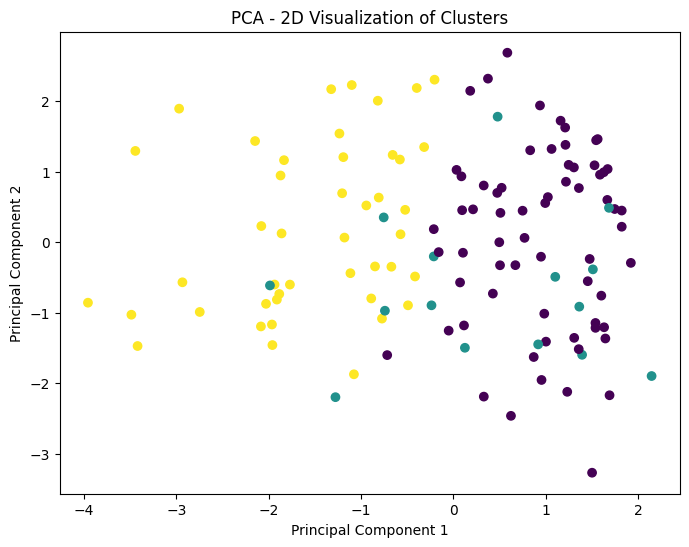

In [24]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'].astype(int), cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Visualization of Clusters')
plt.show()

## Task 4: Fetching Geolocational Data from Foursquare API
#### In this task, we are using the Foursquare API to fetch geolocational data, including nearby amenities such as restaurants.

##### FoursquareAPI key: fsq3boHgIjG5qvz5vBtpvE8ns4qAo4lrrPFLBf+tlbn+dr8=

In [25]:
api_key = 'fsq3boHgIjG5qvz5vBtpvE8ns4qAo4lrrPFLBf+tlbn+dr8='
url = 'https://api.foursquare.com/v3/places/search'
location = {
    'lat': 12.972819,  # Bengaluru city latitude
    'lng': 77.636116   # Bengaluru city longitude
}
params = {
    'll': f"{location['lat']},{location['lng']}",
    'radius': 5000,  # Radius in meters
    'query': 'food',
    'categories': '13000',
    'limit': 10
}
headers = {
    'Accept': 'application/json',
    'Authorization': api_key
}
response = requests.get(url, params=params, headers=headers)

print(f"Status Code: {response.status_code}")
print(f"Response: {response.text}")

if response.status_code == 200:
    results = response.json()

    # Initialize a list to store venue information
    venues = []
    country_map = {
    'IN': 'India' }  

    # Check if the results contain any places
    if 'results' in results and len(results['results']) > 0:
        # Loop through the results and extract required data
        for i, place in enumerate(results['results'], start=1):
            name = place.get('name', 'Unknown')
            location = place.get('location', {})
            address = location.get('formatted_address', 'Address not available')
            country_code = location.get('country', 'N/A')
            country = country_map.get(country_code, country_code)
            city = location.get('locality', 'N/A')
            postcode = location.get('postcode', 'N/A')

            # Add each place to the list
            venues.append({
                'name': name,
                'address': address,
                'country': country,
                'city': city,
                'postcode': postcode
            })

        # Convert the list of venues to a DataFrame
        api_df = pd.DataFrame(venues)

    else:
        print("No results found for this query.")
else:
    print(f"Error: {response.status_code}, {response.text}")

Status Code: 200
Response: {"results":[{"fsq_id":"4e05b1dae4cdefcff6d0c91b","categories":[{"id":13072,"name":"Asian Restaurant","short_name":"Asian","plural_name":"Asian Restaurants","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/food/asian_","suffix":".png"}}],"chains":[],"closed_bucket":"LikelyOpen","distance":93,"geocodes":{"main":{"latitude":12.97363,"longitude":77.635694},"roof":{"latitude":12.97363,"longitude":77.635694}},"link":"/v3/places/4e05b1dae4cdefcff6d0c91b","location":{"address":"54 Double Road","address_extended":"Near Esi Hospital, Indiranagar","country":"IN","cross_street":"Double Road, Indiranagar","formatted_address":"54 Double Road (Double Road, Indiranagar), Bangalore 560038, Karnātaka","locality":"Bangalore","postcode":"560038","region":"Karnātaka"},"name":"Kim Lee Restaurant","related_places":{},"timezone":"Asia/Kolkata"},{"fsq_id":"5141e035e4b08c0fabb33fe1","categories":[{"id":13199,"name":"Indian Restaurant","short_name":"Indian","plural_name":"India

In [26]:
api_df.head(10)

,name,address,country,city,postcode
0,Kim Lee Restaurant,"54 Double Road (Double Road, Indiranagar), Ban...",India,Bangalore,560038
1,Khan Saheb,"7th Main, 13th Cross, Indiranagar, Bangalore 9...",India,Bangalore,941735
2,Phobidden Fruit,"965 12th Main Nr. Sony Centre (HAL 2nd Stage, ...",India,Bangalore,560038
3,Imperial Restaurant,"1314 Double Road, Indira Nagar Stage 2 (Indira...",India,Bangalore,560038
4,Mamagoto,"949 Ground Floor, 12th Main, Off 100 Feet Road...",India,Bangalore,560008
5,Chianti Ristorante and Wine Bar,"960 12th Main, Hal 2nd Stage, Bangalore 560008...",India,Bangalore,560008
6,Nagarjuna,"195 Double Road, Indiranagar (Double Rd), Bang...",India,Bangalore,560038
7,Krispy Kreme Doughnuts,"Jk Plaza (12th Main, Off 100 Feet Road), Banga...",India,Bangalore,560008
8,California Burrito,"Shop No 23, Ground Floor, 3rd B Cross, 60 Feet...",India,Bangalore,560071
9,Chinita Real Mexican Food,"218 Double Road, Indiranagar, Bangalore 560038...",India,Bangalore,560038


#### Analyzing the nearby amenities of residential areas:

In [ ]:
api_key = 'fsq3boHgIjG5qvz5vBtpvE8ns4qAo4lrrPFLBf+tlbn+dr8='
url = 'https://api.foursquare.com/v3/places/search'
location = {
    'lat': 12.972819,  # Bengaluru city latitude
    'lng': 77.636116   # Bengaluru city longitude
}
params = {
    'll': f"{location['lat']},{location['lng']}",
    'radius': 5000,  # Radius in meters
    'categories': '4f2a25ac4b909258e854f55f,4e67e38e036454776db1fb3a,4d954b06a243a5684965b473', #neighborhood
    'limit': 10
}
headers = {
    'Accept': 'application/json',
    'Authorization': api_key
}
response = requests.get(url, params=params, headers=headers)
residential_data = response.json()
if response.status_code == 200:
    residential_locations = []
    for place in residential_data['results']:
        residential_locations.append({
            'serial_number': len(residential_locations) + 1,
            'longitude': place['geocodes']['main']['longitude'],
            'latitude': place['geocodes']['main']['latitude']
    })
    residential_df = pd.DataFrame(residential_locations)
    
    # Step 2: Get Nearby Amenities
    categories = {
        'restaurants': '4d4b7105d754a06374d81259',
        'grocery_stores': '4bf58dd8d48988d118951735,4bf58dd8d48988d118951735',
        'gyms': '4bf58dd8d48988d176941735,4bf58dd8d48988d175941735'
    }
    
    for amenity, category_id in categories.items():
        amenity_counts = []
        for _, location in residential_df.iterrows():
            params = {
                'll': f"{location['latitude']},{location['longitude']}",
                'radius': 500,
                'categories': category_id,
                'limit': 50
            }
            response = requests.get(url, params=params, headers=headers)
            data = response.json()
            amenity_counts.append(len(data.get('results', [])))
        residential_df[f'Number_of_{amenity}'] = amenity_counts
    
    # Step 3: Final Dataframe
    final_df = pd.DataFrame(residential_df)
    print(final_df.head(5))
    residential_df.to_csv("residential_data.csv", index=False)

else:
    print(f"Error: {response.status_code}, {response.text}")

## Task-5 Plot the clustered locations on a map
#### Applying K-means and plotting clusters on map using Folium:

In [ ]:
data = pd.read_csv('residential_data.csv')
# Extracting only the latitude and longitude for clustering
location_data = data[['latitude', 'longitude']]
optimal_k = 3  # Replace with the value you calculated
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(location_data)
# Calculate the center of the map
center_lat, center_lon = location_data.mean()
# Create a Folium map
map_clusters = folium.Map(location=[center_lat, center_lon], zoom_start=12)
colors = ['red', 'blue', 'green', 'purple', 'orange']

for _, row in data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=colors[int(row['cluster']) % len(colors)],
        fill=True,
        fill_color=colors[int(row['cluster']) % len(colors)],
        fill_opacity=0.7,
        popup=f"Cluster: {row['cluster']}"
    ).add_to(map_clusters)

# Save map to an HTML file
map_clusters.save("clustered_map.html")
# Display map in a Jupyter notebook (optional)
map_clusters